# Predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given Clinical parameter about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleveland data from the UCI machine learning repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research or by talking to the subject matter expert(someone who knows about the dataset).

**Create a data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to   the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart      related)
  * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for   concern
5. chol - serum cholestoral in mg/dl
  * serum = LDL + HDL + .2 * triglycerides
  * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
  * 0: Nothing to note
  * 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
  * 2: Possible or definite left ventricular hypertrophy
    * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
  * 0: Upsloping: better heart rate with excercise         (uncommon)
  * 1: Flatsloping: minimal change (typical healthy heart)
  * 2: Downslopins: signs of unhealthy heart
12. ca - number of major ve ssels (0-3) colored by flourosopy
  * colored vessel means the doctor can see the blood passing through
  * the more blood movement the better (no clots) 
13. thal - thalium stress result
  * 1,3: normal
  * 6: fixed defect: used to be defect but ok now
  * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plot to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix

## Load Data

In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape # (rows and columns)

(303, 14)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing with the data and how do we deal with it?
4. Where are the outliners and why should we care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

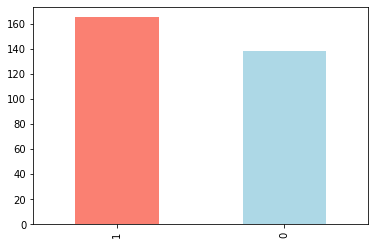

In [6]:
df.target.value_counts().plot(kind="bar",
                             color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


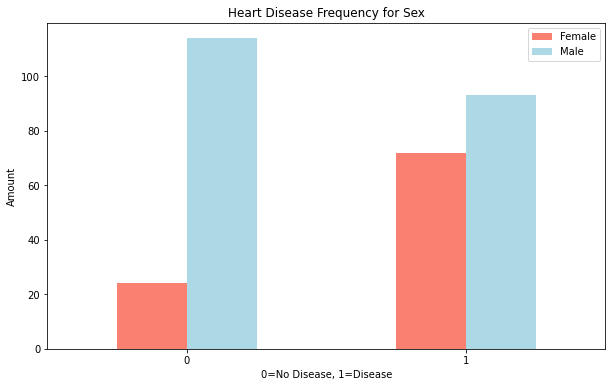

In [12]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

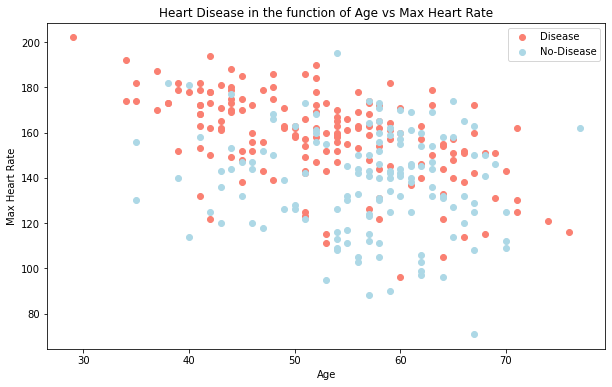

In [13]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon")      

# Scatter with negative examples
plt.scatter(df["age"][df["target"]==0],
           df["thalach"][df["target"]==0],
           color="lightblue")

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Heart Disease in the function of Age vs Max Heart Rate")
plt.legend(["Disease","No-Disease"]);

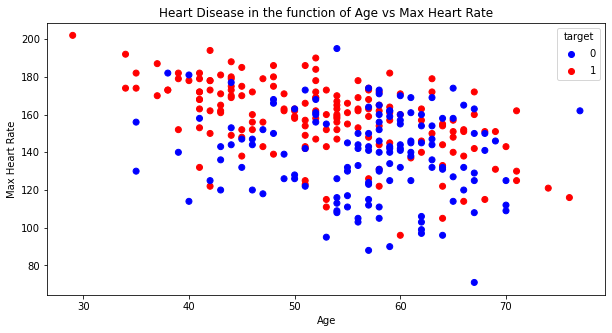

In [14]:
# plotting the same graph using OO-method
fig,ax=plt.subplots(figsize=(10,5))
scatter=ax.scatter(df.age,
          df.thalach,
          c=df.target,
           cmap="bwr",
        )
ax.legend(*scatter.legend_elements(),title="target")
ax.set(xlabel="Age",
      ylabel="Max Heart Rate",
      title="Heart Disease in the function of Age vs Max Heart Rate");

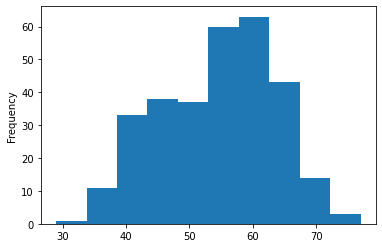

In [15]:
# Checking the distribution of the age column with a histogram
df.age.plot(kind="hist");

### Heart Disease Frequency per Chest Pain type

cp - chest pain type

 * 0: Typical angina: chest pain related decrease blood supply to the heart
 * 1: Atypical angina: chest pain not related to heart
 * 2: Non-anginal pain: typically esophageal spasms (non     heart related)
 * 3: Asymptomatic: chest pain not showing signs of disease


In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


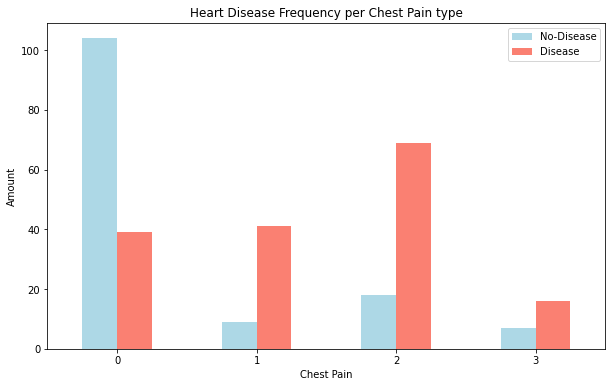

In [17]:
# Making the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                 color=["lightblue","salmon"])

plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.title("Heart Disease Frequency per Chest Pain type")
plt.xticks(rotation=0)
plt.legend(["No-Disease","Disease"]);

In [18]:
# Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


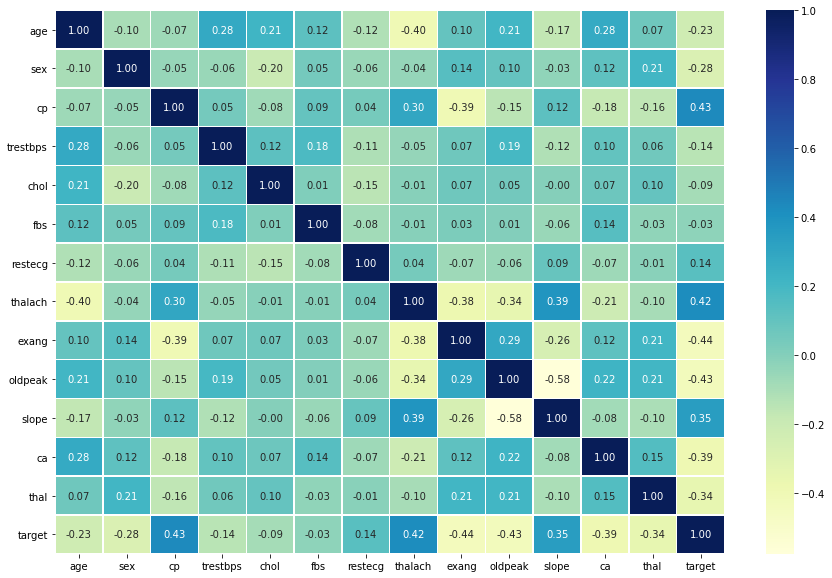

In [19]:
# Making our correlation matrix more visual
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               cmap="YlGnBu",
               annot=True,
               fmt=".2f",
              linewidths=0.5)

**Correlation heatmaps are used to find the relations between the features and with labels.**

1. Positive values on heatmap represents direct relation.

2. Negative values on heatmap represents indirect relation.

3. Values closer to zero represents no or little relation.


In the above heatmap we can observe the relations among features and label columns.

* **On looking at the target column we can observe that cp(chest pain) has the highest positive value. This means on increasing the value of "cp", the probability of getting heart disease also increases(target=1).(DIRECT RELATION)**

      cp - chest pain type
      0: Typical angina: chest pain related decrease blood supply to the heart
      1: Atypical angina: chest pain not related to heart
      2: Non-anginal pain: typically esophageal spasms (non heart related)
      3: Asymptomatic: chest pain not showing signs of disease
        
        
        

* **On the other hand, we can also observe that exang(exercised induced angina) has the highest negative value which means on increasing the value of exang( exang=1, means angina induced from exercise), the probability of getting heart disease decreases(target=0).(INDIRECT RELATION)**

      exang - exercise induced angina (1 = yes; 0 = no)

## 5. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Splitting data into X and y
X=df.drop("target",axis=1)

y=df.target

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Splitting data into train and test sets
np.random.seed(9)

# Splitting into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2


In [26]:
y_train

132    1
192    0
215    0
213    0
229    0
      ..
65     1
125    1
251    0
56     1
126    1
Name: target, Length: 242, dtype: int64

 Now we've got our data split into training and test sets, it's time to build a machine learning model.
 
 We'll train it (find the patterns) on the training set.
 
 And we'll test it (use the patterns) on the test set.
 
 We're going to try 3 different machine learning models:
 1. Logistic Regression
 2. K-Nearest Neighbours Classifier
 3. Random Forest Classifier

In [27]:
# Putting models in a dictionary
models={"Logistic-Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "RandomForest Classifier": RandomForestClassifier()}
model_scores={}
# Create a funstion to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    
    # setting up random seed
    np.random.seed(9)
    
    # Making an empty dictionary
    model_scores={}
    
    # Loop through the models
    for model_name,model in models.items():
        # Fit the model
        model.fit(X_train,y_train)
        # Evaluate the model and appending it's score in model_scores
        model_scores[model_name]=model.score(X_test,y_test)
   
    return model_scores

In [28]:
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test) 
model_scores

C:\Users\shubh\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic-Regression': 0.8360655737704918,
 'KNN': 0.7049180327868853,
 'RandomForest Classifier': 0.7540983606557377}

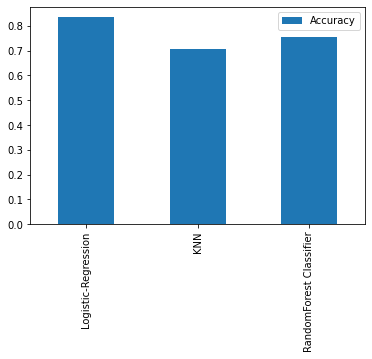

In [29]:
model_compare= pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot(kind="bar");

In [30]:
model_compare.T

,Accuracy
Logistic-Regression,0.836066
KNN,0.704918
RandomForest Classifier,0.754098


Now we've got a baseline model... and we know a model's first prediction aren't always their best predictions:

We're looking at the following :
* HyperParameters tuning
* Feature Importance
* Confusion Matrix
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under curve (AUC)

 ### Hyperparameters Tuning

In [31]:
# Tuning KNN 
train_scores=[]
test_scores=[]

# Creating list of different values for n_neighbors
neighbors=range(1,21)# you can also write np.arange(1,21,1) 

# detting up KNN model instance
knn=KNeighborsClassifier()

# Looping through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fitting the model
    knn.fit(X_train,y_train)
    
    # Updating the train_scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Updating the test_scores list
    test_scores.append(knn.score(X_test,y_test))

In [32]:
train_scores

[1.0,
 0.8016528925619835,
 0.7892561983471075,
 0.7355371900826446,
 0.7396694214876033,
 0.7479338842975206,
 0.731404958677686,
 0.7066115702479339,
 0.7066115702479339,
 0.7107438016528925,
 0.7148760330578512,
 0.7066115702479339,
 0.6859504132231405,
 0.7066115702479339,
 0.6900826446280992,
 0.6942148760330579,
 0.7066115702479339,
 0.6942148760330579,
 0.6942148760330579,
 0.6735537190082644]

In [33]:
test_scores

[0.7049180327868853,
 0.5901639344262295,
 0.7377049180327869,
 0.639344262295082,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.6721311475409836,
 0.6885245901639344,
 0.639344262295082,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869]

Maximum KNN score on the test data: 75.41%


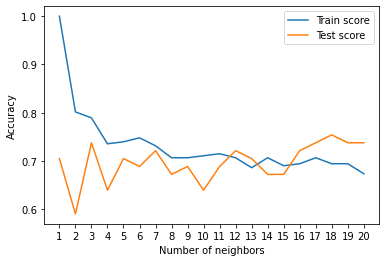

In [34]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,21))
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV


Choosing the right hyperparameters to tune and the range of values they accept can be done by researching them and reading the documentations.

In [35]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid= {"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# We are using the range of values for hyperparameters rather than discrete values 
#beacause it is highly recommended to use continuous distribution for continuous parameters.

# Creating a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators": np.arange(0,1000,50),
        "max_depth": [None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameters grid setup for each of our models, let's tune them using RandomizedSearchCV

In [36]:
# Tuning Logistic Regression

np.random.seed(9)

# Setting up random hyperparameters search for Logistic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=2)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] solver=liblinear, C=0.0018329807108324356 .......................
[CV] ........ solver=liblinear, C=0.0018329807108324356, total=   0.0s
[CV] solver=liblinear, C=0.0018329807108324356 .......................
[CV] ........ solver=liblinear, C=0.0018329807108324356, total=   0.0s
[CV] solver=liblinear, C=0.004832930238571752 ........................
[CV] ......... solver=liblinear, C=0.004832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.004832930238571752 ........................
[CV] ......... solver=liblinear, C=0.004832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.004832930238571752 ........................
[CV] ......... solver=liblinear, C=0.004832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.004832930238571752 ........................
[CV] ......... solver=liblinear, C=0.004832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.004832930238571752 ........................
[CV] ......... solver=liblinear, C=0.004832930238571752, total=   0.0s
[CV] 

[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [37]:
# Finding best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [38]:
# Evaluating the randomized search LogisticRegression model
rs_log_reg.score(X_test,y_test)

0.8360655737704918

In [39]:
model_scores

{'Logistic-Regression': 0.8360655737704918,
 'KNN': 0.7049180327868853,
 'RandomForest Classifier': 0.7540983606557377}

Now we've tuned the LogisticRegression(), let's do the same for RandomForestClassfier()

In [40]:
# Setup random seed
np.random.seed(9)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=2)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=5, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=5, max_depth=None, total=   0.5s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=5, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=5, max_depth=None, total=   0.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=5, max_depth=None 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=5, max_depth=None, total=   0.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=5, max_depth=None 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=5, max_depth=None, total=   0.5s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=5, max_depth=None 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=5, max_depth=None, total=   0.5s
[CV] n_estimators=200, min_samples_split=14, min_samples_leaf=9, max_depth=5 
[CV]  n_estimators=200, min_samples_split=14, min_samples_leaf=9, max_depth=5, total=   0.7s
[CV] n_estimators=200, min_samples_split=14, min_samples_leaf=9, max_depth=5 
[CV]  n_estimators=200, min_samples_split=14, min_samples_leaf=9, max_depth=5, total=   0.7s
[CV] n_estimators=200, min_samples_spl

C:\Users\shubh\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shubh\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shubh\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\shubh\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_base.py", line 134, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\shubh\heart-disease-project\env\lib\site-packages\sklearn\model_selecti

[CV]  n_estimators=0, min_samples_split=10, min_samples_leaf=9, max_depth=10, total=   0.0s
[CV] n_estimators=0, min_samples_split=10, min_samples_leaf=9, max_depth=10 
[CV]  n_estimators=0, min_samples_split=10, min_samples_leaf=9, max_depth=10, total=   0.0s
[CV] n_estimators=0, min_samples_split=10, min_samples_leaf=9, max_depth=10 
[CV]  n_estimators=0, min_samples_split=10, min_samples_leaf=9, max_depth=10, total=   0.0s
[CV] n_estimators=0, min_samples_split=10, min_samples_leaf=9, max_depth=10 
[CV]  n_estimators=0, min_samples_split=10, min_samples_leaf=9, max_depth=10, total=   0.0s
[CV] n_estimators=0, min_samples_split=10, min_samples_leaf=9, max_depth=10 
[CV]  n_estimators=0, min_samples_split=10, min_samples_leaf=9, max_depth=10, total=   0.0s
[CV] n_estimators=350, min_samples_split=18, min_samples_leaf=19, max_depth=None 
[CV]  n_estimators=350, min_samples_split=18, min_samples_leaf=19, max_depth=None, total=   1.4s
[CV] n_estimators=350, min_samples_split=18, min_samp

[CV]  n_estimators=700, min_samples_split=6, min_samples_leaf=3, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=6, min_samples_leaf=3, max_depth=5 
[CV]  n_estimators=700, min_samples_split=6, min_samples_leaf=3, max_depth=5, total=   2.0s
[CV] n_estimators=450, min_samples_split=14, min_samples_leaf=5, max_depth=3 
[CV]  n_estimators=450, min_samples_split=14, min_samples_leaf=5, max_depth=3, total=   1.2s
[CV] n_estimators=450, min_samples_split=14, min_samples_leaf=5, max_depth=3 
[CV]  n_estimators=450, min_samples_split=14, min_samples_leaf=5, max_depth=3, total=   1.3s
[CV] n_estimators=450, min_samples_split=14, min_samples_leaf=5, max_depth=3 
[CV]  n_estimators=450, min_samples_split=14, min_samples_leaf=5, max_depth=3, total=   1.3s
[CV] n_estimators=450, min_samples_split=14, min_samples_leaf=5, max_depth=3 
[CV]  n_estimators=450, min_samples_split=14, min_samples_leaf=5, max_depth=3, total=   1.4s
[CV] n_estimators=450, min_samples_split=14, min_sample

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
       650, 700, 750, 800, 850, 900, 950])},
                   verbose=2)

In [41]:
rs_rf.best_params_

{'n_estimators': 850,
 'min_samples_split': 4,
 'min_samples_leaf': 17,
 'max_depth': 10}

In [42]:
# Evaluating the randomized search LogisticRegression model
rs_rf.score(X_test,y_test)

0.8032786885245902

As we can see that we achieved an improvement in the RandomForestClassifier model after hyperparameters tuning by randomized search but it is still less accurate than logistic regression model

In [43]:
model_scores # Baseline model scores

{'Logistic-Regression': 0.8360655737704918,
 'KNN': 0.7049180327868853,
 'RandomForest Classifier': 0.7540983606557377}

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV()

In [44]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Setting up grid hyperparameter search for LogisticRegression model
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=2)
# Fitting grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=0.00018873918221350977, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.0003562247890262444, solver=liblinear .......................
[CV] ........ C=0.0003562247890262444, solver=liblinear, total=   0.0s
[CV] C=0.0003562247890262444, solver=liblinear .......................
[CV] ........ C=0.0003562247890262444, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] 

[CV] C=2.592943797404667, solver=liblinear ...........................
[CV] ............ C=2.592943797404667, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=9.236708571873866, solver=liblinear ...........................
[CV] ............ C=9.236708571873866, solver=liblinear, total=   0.0s
[CV] C

[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [45]:
# Finding best hyperpaameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [46]:
# Evaluating the Grid search LogisticRegression model
gs_log_reg.score(X_test,y_test)

0.8360655737704918

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

...and it would be great if cross-validation is used where possible

In [47]:
# Make prediction with tuned model
y_preds=gs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [48]:
y_test

81     1
38     1
13     1
100    1
158    1
      ..
181    0
104    1
278    0
32     1
69     1
Name: target, Length: 61, dtype: int64

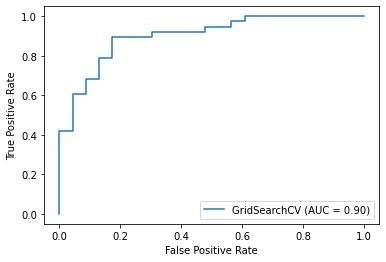

In [49]:
# Plot ROC curve and calculate AUC score
plot_roc_curve(gs_log_reg,
               X_test
               ,y_test);

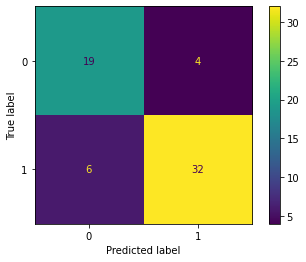

In [50]:
# Confusion Matrix
plot_confusion_matrix(gs_log_reg,
                     X_test,
                     y_test);

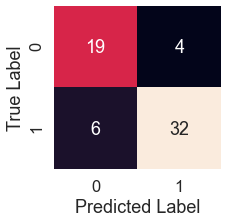

In [51]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    ax.set(xlabel="Predicted Label",
          ylabel="True Label")
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1- score

In [52]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.89      0.84      0.86        38

    accuracy                           0.84        61
   macro avg       0.82      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



Macro average doesn't take class imbalance into account. If there is class imbalance in the dataset then we should pay attention on macro avg.

While weighted avg favours the majority class.

### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall, f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [53]:
# Checking best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [54]:
# Create a new classifier with best parameters
clf=LogisticRegression(C=1.3738237958832638,
                      solver="liblinear")

In [55]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

In [56]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8215300546448088

In [57]:
# Cross-validated precision
cv_precision=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                      scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.817900063251107

In [58]:
# Cross-validated recall
cv_recall=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall 

0.8727272727272727

In [59]:
# Cross-validated F1-Score
cv_f1=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8431741323998502

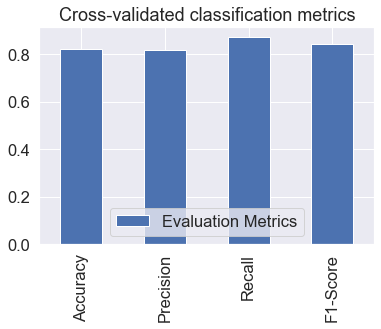

In [60]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1-Score":cv_f1},
                          index=["Evaluation Metrics"])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics");

### Feature Importance

Feature importance is another as asking, "which feature contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for eac machine learning model.

In [64]:
# Fit he instance of LogisticRegression
clf=LogisticRegression(C=1.3738237958832638,
                      solver="liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [66]:
# Check coef
clf.coef_

array([[-0.0020061 , -1.65300502,  0.74809672, -0.02017485, -0.001842  ,
         0.19006773,  0.65316278,  0.03415555, -0.80074478, -0.59439718,
         0.59140142, -0.75009452, -0.84562951]])

In [67]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': -0.002006099479097666,
 'sex': -1.6530050159645484,
 'cp': 0.7480967157450684,
 'trestbps': -0.020174854283116748,
 'chol': -0.0018419960480302049,
 'fbs': 0.1900677252065389,
 'restecg': 0.6531627752826917,
 'thalach': 0.03415554605584454,
 'exang': -0.8007447813584689,
 'oldpeak': -0.5943971793911929,
 'slope': 0.591401418813425,
 'ca': -0.7500945204250998,
 'thal': -0.845629508554747}

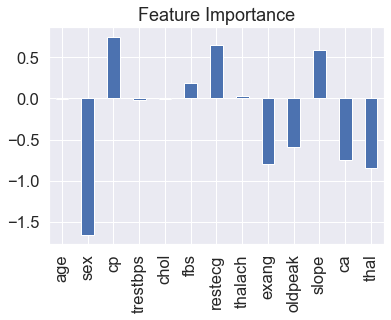

In [78]:
# Visualize Feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);


The positive bar graph values represents direct relation of the feature with the target label. While negative value represent inverse relation between feature and target label

In [82]:
# Inverse relation of sex and target columns 
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


If sex value is 1 (Male) then there are less chances (0) of heart disease and vice versa.

In [84]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Now slope is showing direct relation with target column, if slope is incresed from 0 to 2 then chances of getting heart disease will also increase(1).

slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart

## 6. Experimentation

If the desired evaluation metric is not achieved then we can try these steps:

* Collect more data.
* Trying a better model. Like CatBoost or XGBoost.
* Trying to improve the current model.

    

In [89]:
import pickle
pickle.dump(clf,
           file=open("heart-disease-predictor-logistic-reg-model.pickle","wb"))